In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import os
import random
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam

In [ ]:
zip_file = '/content/drive/MyDrive/ComputerVision/ModuleProject/facial_expression_data_set.zip'
data_dir  = '/content/drive/MyDrive/ComputerVision/ModuleProject/Dataset/'
class_labels = ['anger', 'disgust', 'fear', 'happiness', 'neutral','sadness', 'surprise']

In [ ]:
# with zipfile.ZipFile(zip_file,'r') as zip_ref:
#   zip_ref.extractall(data_dir)

In [ ]:
# number of images to feed into the NN for every batch
batch_size = 128
# size of the image: 48*48 pixels
pic_size = 48

In [ ]:
# number of images to feed into the NN for every batch
batch_size = 128
# size of the image: 48*48 pixels
pic_size = 48

# load data
train_datagen = ImageDataGenerator(
					rescale=1./255,
          rotation_range=30,
          shear_range=0.2,  # Reduced shear range
          zoom_range=0.2,   # Reduced zoom range
          width_shift_range=0.2,  # Added width shift
          height_shift_range=0.2,  # Added height shift
          horizontal_flip=True,
          fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    data_dir+'train',
    target_size=(pic_size , pic_size ),
    batch_size=batch_size,
    color_mode='grayscale',
		class_mode='categorical',
		shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir+'test',
    target_size=(pic_size , pic_size ),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True
)


Found 32298 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


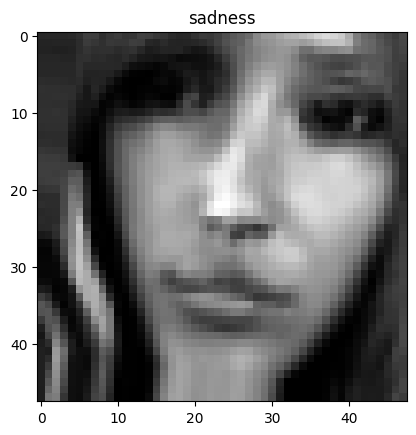

In [ ]:
img, label =  train_generator.__next__()

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()


In [ ]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [ ]:
num_train_imgs = 0
for root, dirs, files in os.walk(data_dir+'train'):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(data_dir+'test'):
    num_test_imgs += len(files)

In [1]:
epochs = 1  # You can adjust the number of epochs as needed
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

NameError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)